<a href="https://colab.research.google.com/github/juandavidarcila/Metodos-Computacionales/blob/main/Semana4/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
X = np.array([1,2,3])
Y = np.array([0,2.5,4])

In [ ]:
#X = np.array([1,2])
#Y = np.array([5,6])

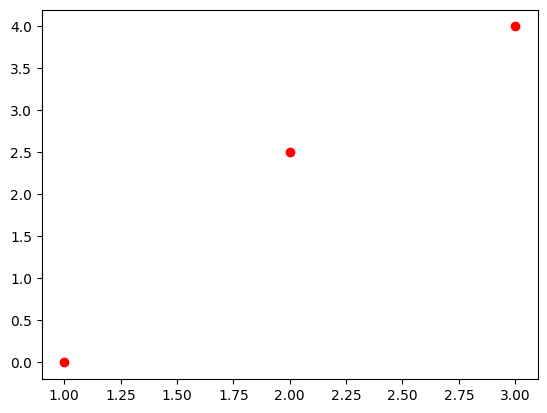

In [ ]:
plt.scatter(X,Y,color='r')

In [ ]:
# Programas la base
def Lagrange(x,X,i):

  L = 1 # Productoria
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L


In [ ]:
# Definir un simbolo
x = sym.Symbol('x',real=True)
x**2

x**2

In [ ]:
L0 = Lagrange(x,X,1).simplify()

In [ ]:
L0

-(x - 3)*(x - 1)

In [ ]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [ ]:
p1 = Interpolate(x,X,Y).expand()
p1

-0.5*x**2 + 4.0*x - 3.5

In [ ]:
pp1 = sym.Poly(p1)
coeficientes = np.array(pp1.all_coeffs(),float)
coeficientes

array([-0.5,  4. , -3.5])

In [ ]:
dp1 = sym.diff(p1,x)
dp1

4.0 - 1.0*x

In [ ]:
dp2 = sym.diff(dp1,x)
dp2

-1.00000000000000

In [ ]:
dp1n = sym.lambdify(x,dp1,'numpy')
dp2n = sym.lambdify(x,dp2,'numpy')

In [ ]:
dp1n(0.2)

3.8

In [ ]:
x0 = 10
error = 10
while error > 1e-9:
  x1 = x0 - dp1n(x0)/dp2n(x0)
  error = np.abs(x1-x0)
  print(error)
  x0 = x1
print(x0)


6.0
0.0
4.0


In [ ]:
x1 = np.linspace(X[0],X[-1],100)
y1 = Interpolate(x1,X,Y)

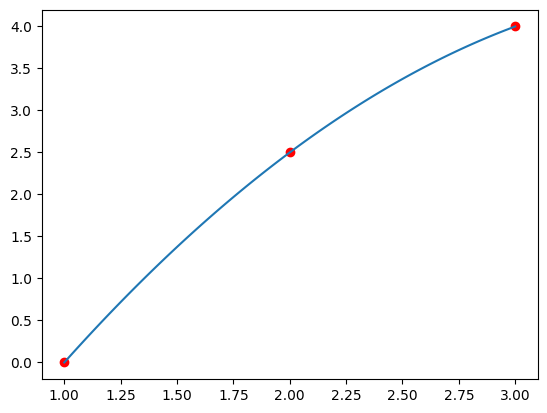

In [ ]:
plt.scatter(X,Y,color='r')
plt.plot(x1,y1)